In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
data=pd.read_csv('../../data/data_science_job.csv')
data.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
13917,17964,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,20.0,500-999,Pvt Ltd,31.0,0.0
12560,26876,city_50,0.896,Male,Has relevent experience,no_enrollment,Graduate,STEM,10.0,10/49,Pvt Ltd,72.0,0.0
11700,16999,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,No Major,6.0,<10,Pvt Ltd,144.0,0.0
7403,22492,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,50-99,Pvt Ltd,70.0,0.0
12906,20493,city_71,0.884,Male,Has relevent experience,Full time course,High School,NaN,10.0,50-99,Funded Startup,23.0,0.0


In [128]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [130]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [131]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [132]:
data.shape

(19158, 13)

In [133]:
cols=list()

In [134]:
for var in data.columns:
    if data[var].isnull().mean() < 0.05 and data[var].isnull().mean() > 0:
        cols.append(var)

cols


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [135]:
data[cols].sample(10)

,city_development_index,enrolled_university,education_level,experience,training_hours
6766,0.920,no_enrollment,Primary School,3.0,17.0
4767,0.920,no_enrollment,Graduate,2.0,13.0
1449,0.624,no_enrollment,Masters,4.0,24.0
12676,0.920,Part time course,Graduate,2.0,75.0
5543,0.926,Full time course,High School,8.0,79.0
10212,0.920,no_enrollment,Graduate,10.0,118.0
9327,0.910,no_enrollment,Graduate,20.0,31.0
5982,0.691,Full time course,Graduate,6.0,60.0
10876,0.897,Full time course,Masters,8.0,35.0
1461,0.926,Full time course,Graduate,4.0,60.0


In [136]:
len(data[cols].dropna())/len(data[cols])

0.8968577095730244

In [137]:
df=data[cols].dropna()

In [138]:
df.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1909,0.920,no_enrollment,Graduate,1.0,35.0
9437,0.884,no_enrollment,Masters,16.0,26.0
11432,0.939,no_enrollment,Masters,20.0,9.0
1641,0.558,Part time course,Graduate,1.0,5.0
7946,0.924,no_enrollment,Graduate,20.0,126.0


In [139]:
data[cols].shape, df.shape

((19158, 5), (17182, 5))

In [140]:
df.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

In [141]:
n_cols=['city_development_index','experience', 'training_hours']
len(n_cols)

3

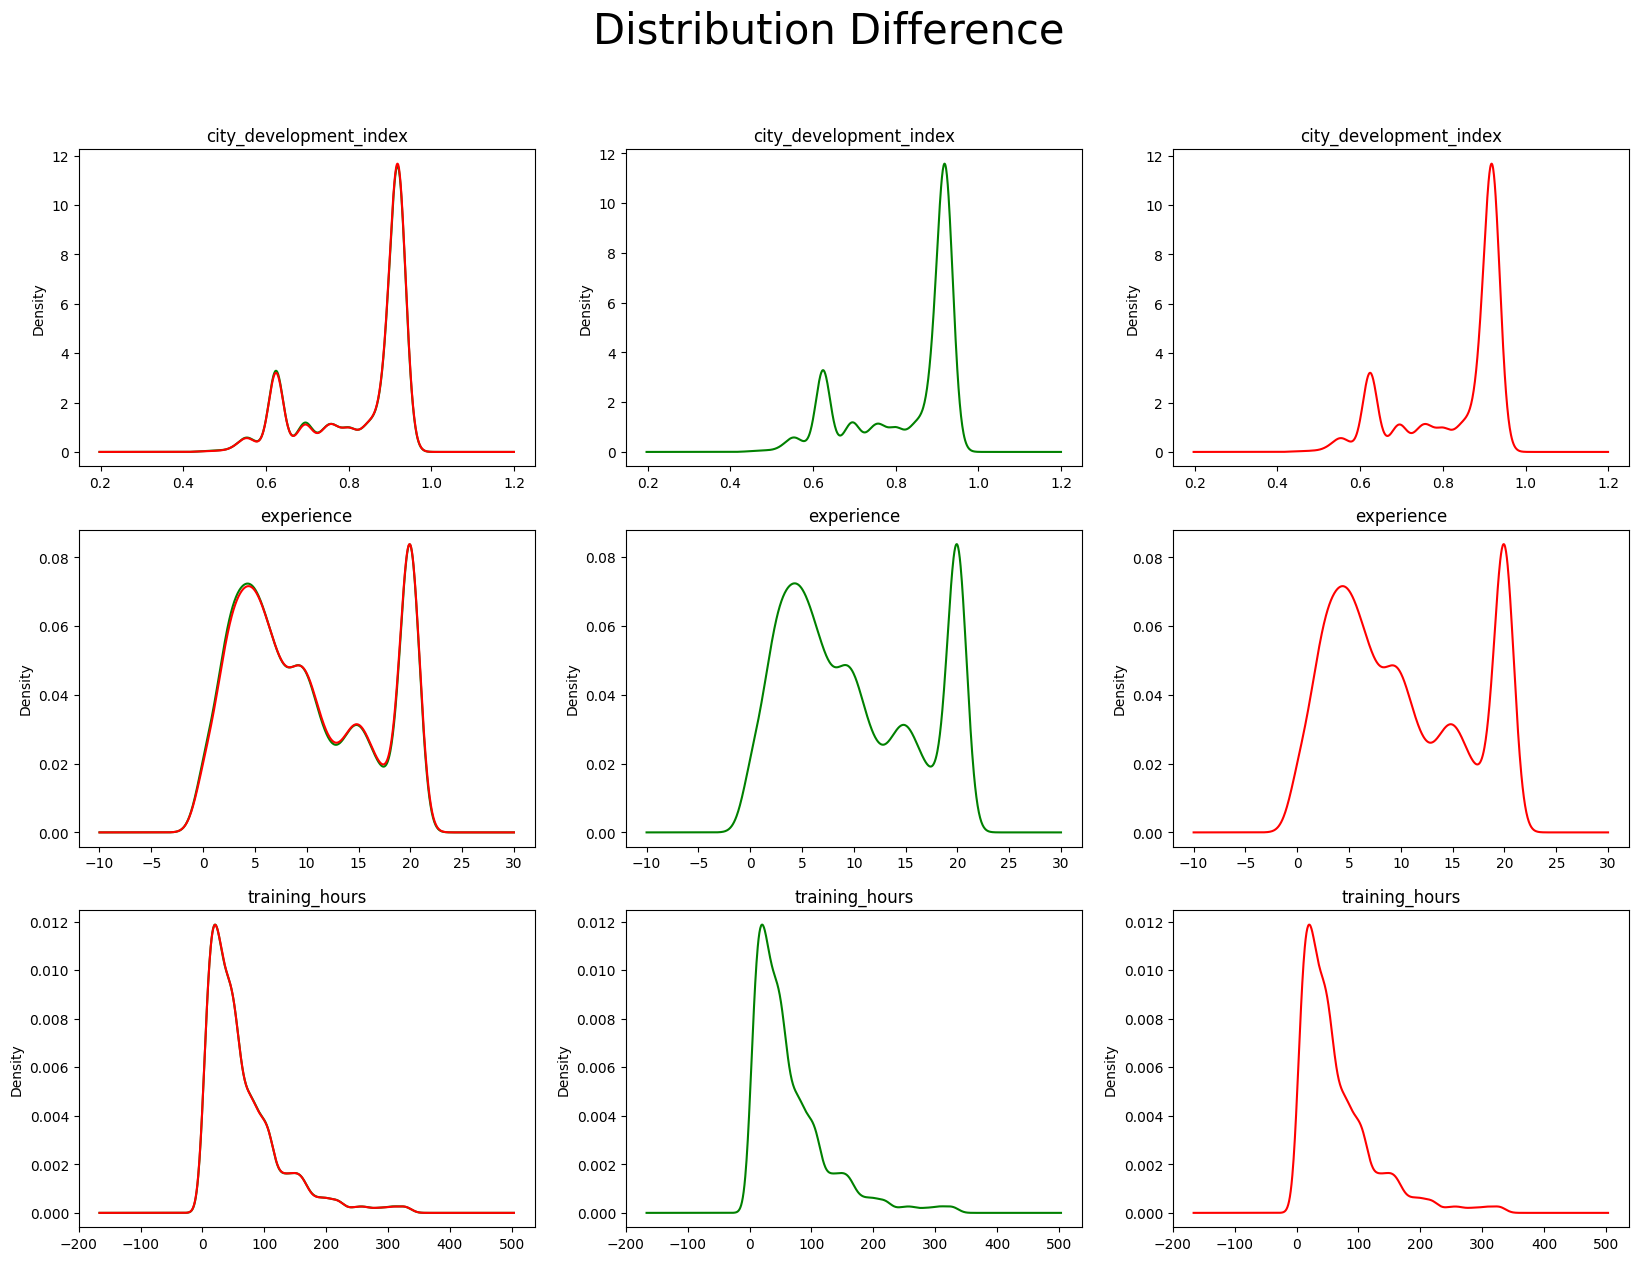

In [142]:
fig,ax=plt.subplots(3,3,figsize=(20,14))
plt.suptitle("Distribution Difference",size=30)
for i in range(len(n_cols)):
    col=n_cols[i]
    ax[i,0].set_title(col)
    data[col].plot.density(color='g',ax=ax[i,0])
    df[col].plot.density(color='r',ax=ax[i,0])

    ax[i,1].set_title(col)
    data[col].plot.density(color='g',ax=ax[i,1])
    ax[i,2].set_title(col)
    df[col].plot.density(color='r',ax=ax[i,2])

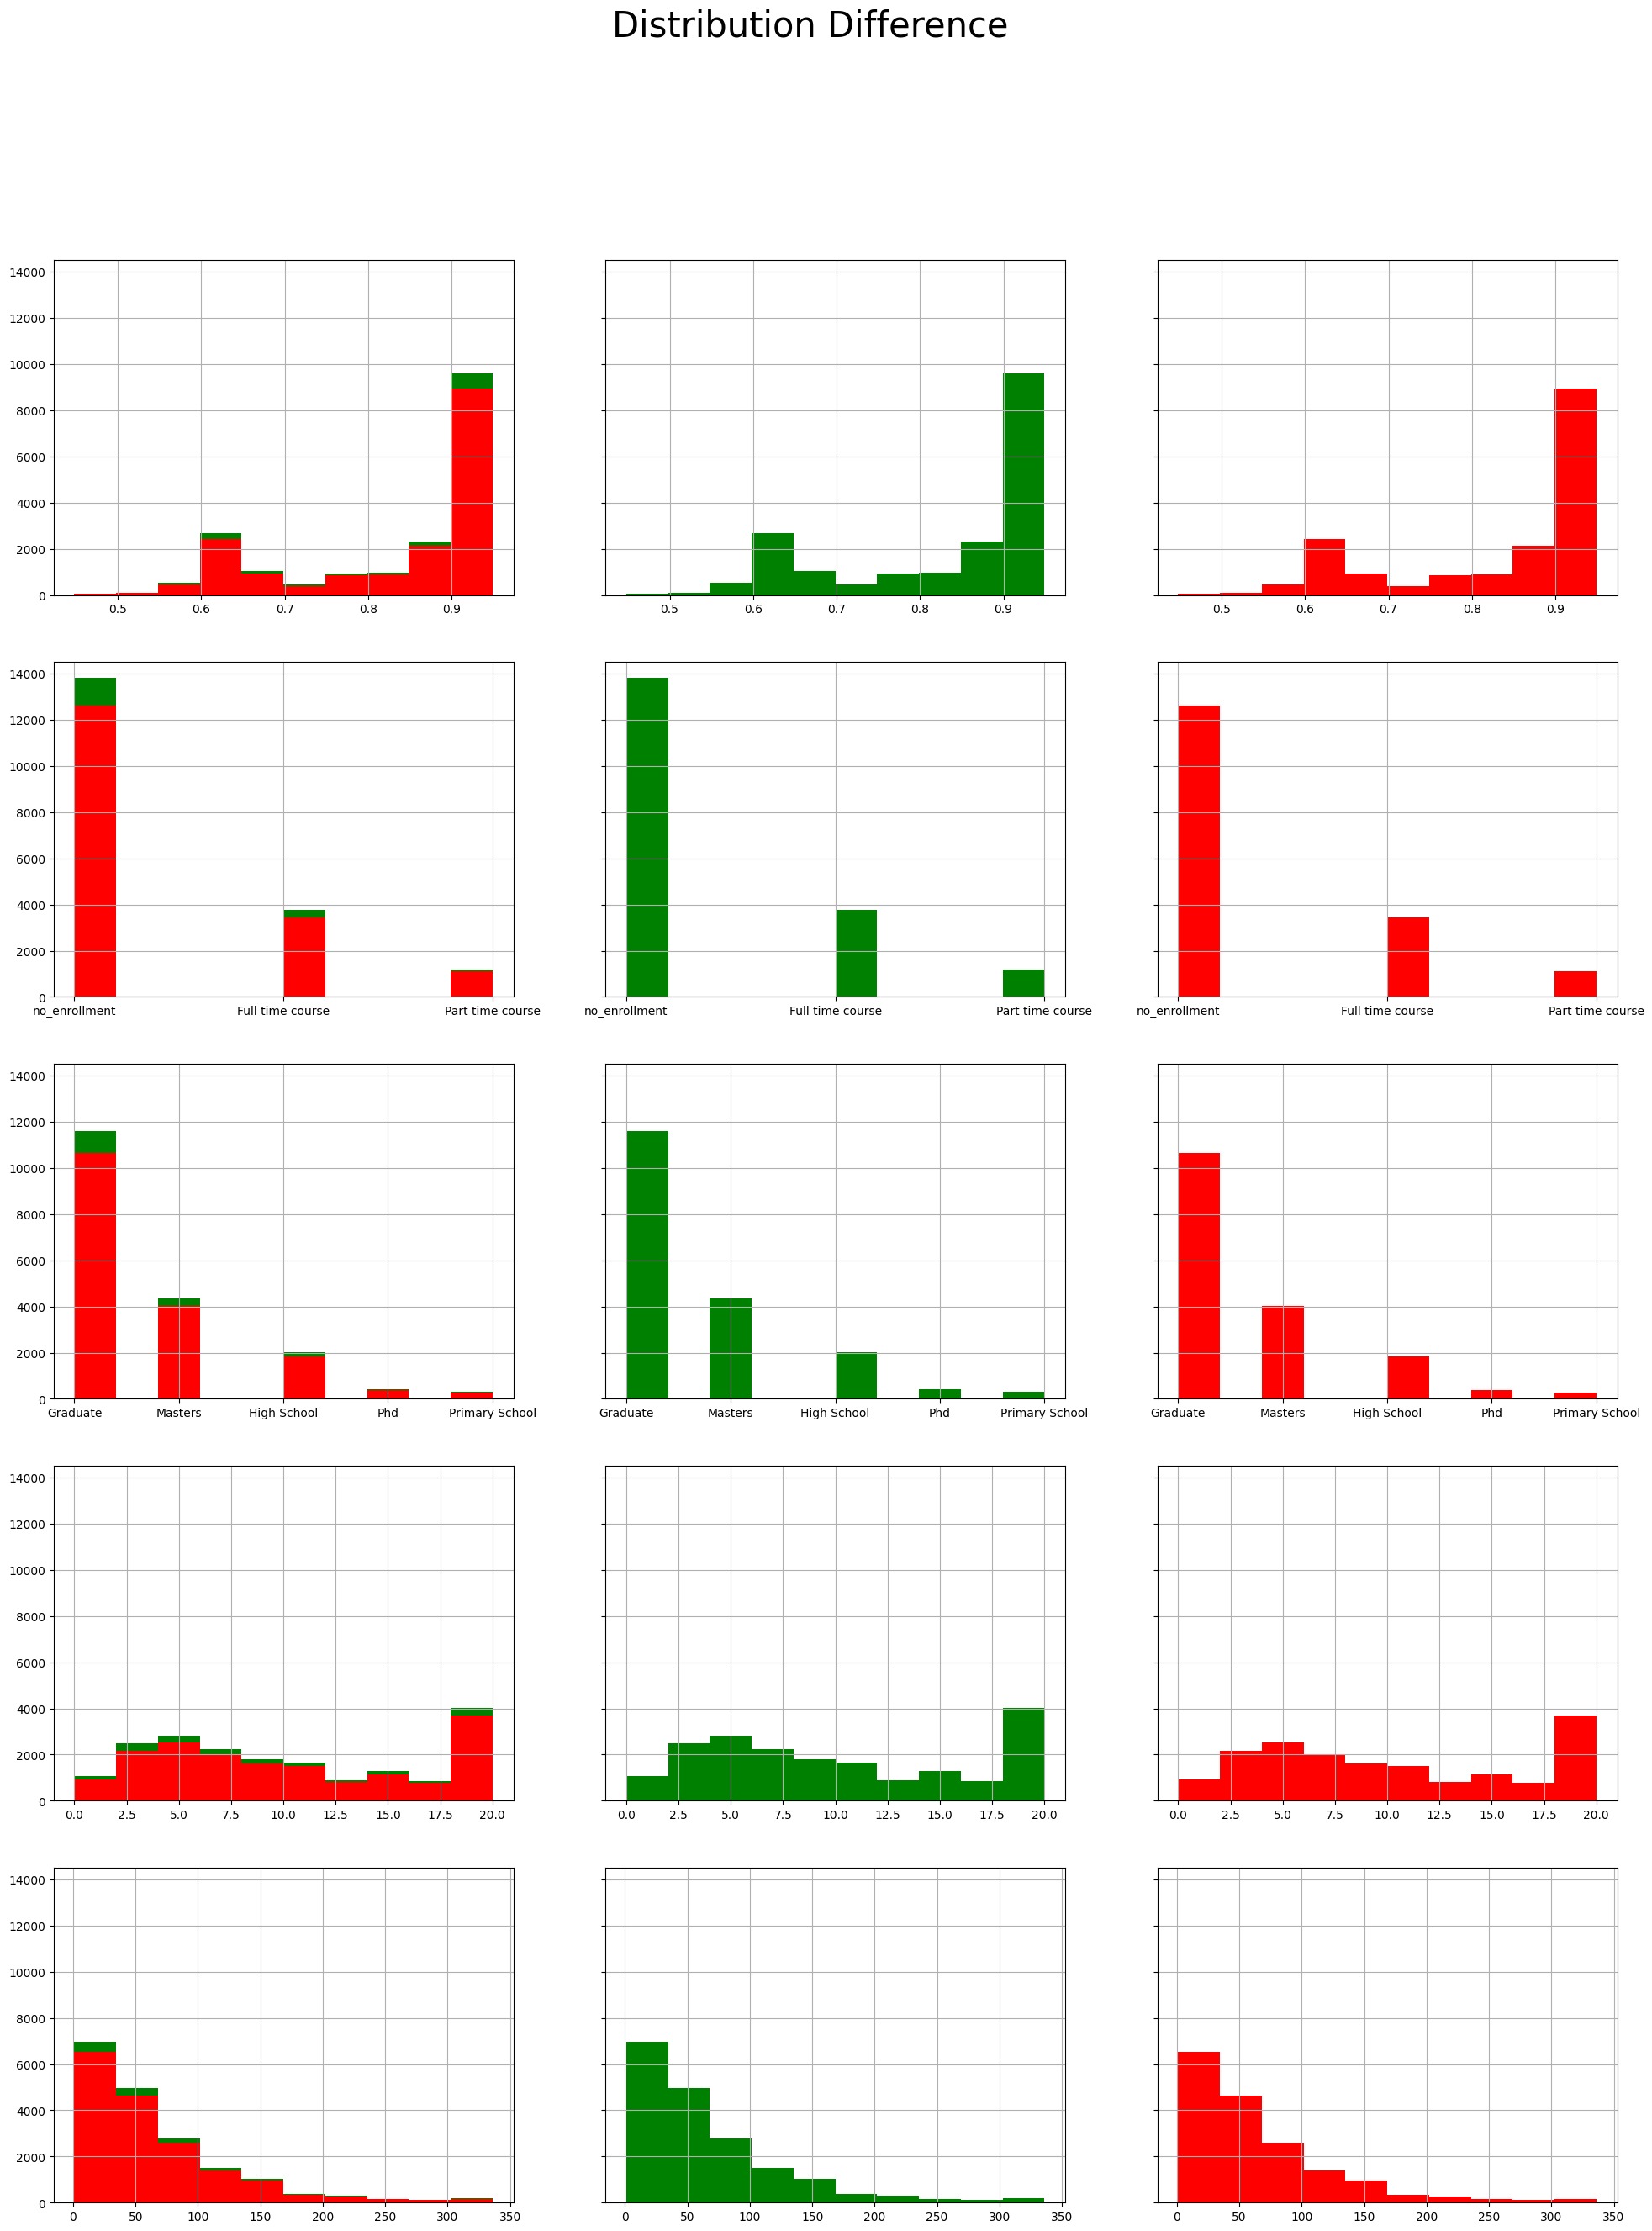

In [143]:
fig,ax=plt.subplots(5,3,figsize=(24,30),sharey=True)
plt.suptitle("Distribution Difference",size=30)
for i in range(len(cols)):
    col=cols[i]
    data[col].hist(color='g',ax=ax[i,0])
    df[col].hist(color='r',ax=ax[i,0])

    data[col].hist(color='g',ax=ax[i,1])

    df[col].hist(color='r',ax=ax[i,2])



In [144]:
data['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [148]:
data['enrolled_university'].isnull().sum()

386

In [146]:
temp = pd.concat([
            # percentage of observations per category, original data
            data['enrolled_university'].value_counts() / len(data),

            # percentage of observations per category, cca data
            df['enrolled_university'].value_counts() / len(df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [147]:
temp = pd.concat([
            # percentage of observations per category, original data
            data['education_level'].value_counts() / len(data),

            # percentage of observations per category, cca data
            df['education_level'].value_counts() / len(df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
